# Forecast next 30 days daily

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
path = r'raw_data_measurements'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep=';',decimal=",",
                      names=["DeviceID", "MeasurementID", "date_time", "energy_consumed","temperature", "wind_velocity", "air_humidity", "cloudiness", "day_length", "day_type", "season"])
    li.append(df)

raw_measurements = pd.concat(li, axis=0, ignore_index=True)



raw_measurements

,DeviceID,MeasurementID,date_time,energy_consumed,temperature,wind_velocity,air_humidity,cloudiness,day_length,day_type,season
0,5004,1.0,2015.09.01 00:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0
1,5004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5004,2.0,2015.09.01 01:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0
3,5004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5004,3.0,2015.09.01 02:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
6129495,5122,30646.0,2019.02.28 21:00:00,16.872,2.764,0.0,0.0,0.0,10.683,1.0,4.0
6129496,5122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6129497,5122,30647.0,2019.02.28 22:00:00,16.594,1.958,0.0,0.0,0.0,10.683,1.0,4.0
6129498,5122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#load device_types file
device_types = pd.read_csv('raw_data_device_types/device-types.csv')

#extract device_type 
device_types['device_type'] = device_types['DeviceCode'].str[-2:]
device_types = device_types.drop(['DeviceCode'], axis=1)
device_types

,DeviceID,device_type
0,5001,CO
1,5002,CO
2,5003,CO
3,5004,CO
4,5005,CW
...,...,...
143,5144,CO
144,5145,CO
145,5146,CO
146,5147,CO


## Transform raw measurements

In [4]:
# drop duplicate, empty rows and reset index
df = raw_measurements.dropna(subset = ['MeasurementID']).reset_index(drop=True)

# format date_time
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y.%m.%d %H:%M:%S')

# merge device types
df = df.merge(device_types, how='left', on='DeviceID')

df

,DeviceID,MeasurementID,date_time,energy_consumed,temperature,wind_velocity,air_humidity,cloudiness,day_length,day_type,season,device_type
0,5004,1.0,2015-09-01 00:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
1,5004,2.0,2015-09-01 01:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
2,5004,3.0,2015-09-01 02:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
3,5004,4.0,2015-09-01 03:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
4,5004,5.0,2015-09-01 04:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
...,...,...,...,...,...,...,...,...,...,...,...,...
3064795,5122,30644.0,2019-02-28 19:00:00,16.955,3.517,0.0,0.0,0.0,10.683,1.0,4.0,CO
3064796,5122,30645.0,2019-02-28 20:00:00,16.946,3.268,0.0,0.0,0.0,10.683,1.0,4.0,CO
3064797,5122,30646.0,2019-02-28 21:00:00,16.872,2.764,0.0,0.0,0.0,10.683,1.0,4.0,CO
3064798,5122,30647.0,2019-02-28 22:00:00,16.594,1.958,0.0,0.0,0.0,10.683,1.0,4.0,CO


In [5]:
# separate CO and CW

co_data = df[df['device_type'] == 'CO'].reset_index(drop=True)
co_data

,DeviceID,MeasurementID,date_time,energy_consumed,temperature,wind_velocity,air_humidity,cloudiness,day_length,day_type,season,device_type
0,5004,1.0,2015-09-01 00:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
1,5004,2.0,2015-09-01 01:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
2,5004,3.0,2015-09-01 02:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
3,5004,4.0,2015-09-01 03:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
4,5004,5.0,2015-09-01 04:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
...,...,...,...,...,...,...,...,...,...,...,...,...
2237299,5122,30644.0,2019-02-28 19:00:00,16.955,3.517,0.0,0.0,0.0,10.683,1.0,4.0,CO
2237300,5122,30645.0,2019-02-28 20:00:00,16.946,3.268,0.0,0.0,0.0,10.683,1.0,4.0,CO
2237301,5122,30646.0,2019-02-28 21:00:00,16.872,2.764,0.0,0.0,0.0,10.683,1.0,4.0,CO
2237302,5122,30647.0,2019-02-28 22:00:00,16.594,1.958,0.0,0.0,0.0,10.683,1.0,4.0,CO


<function matplotlib.pyplot.show(close=None, block=None)>

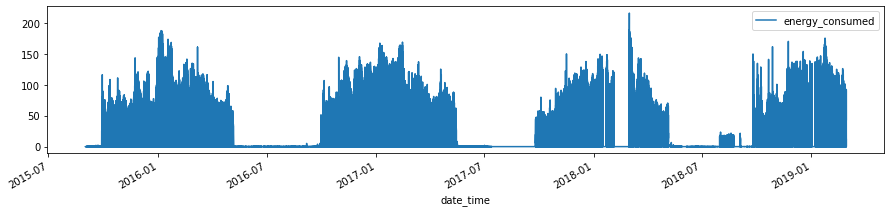

In [6]:
co_data.plot(x="date_time", y=["energy_consumed"], figsize=(15, 3))
plt.show

In [7]:
# sum daily
co_daily = co_data.groupby(co_data['date_time'].dt.date, as_index=True).agg(energy_consumed=('energy_consumed', 'sum'))
co_daily.reset_index(inplace=True)
co_daily

,date_time,energy_consumed
0,2015-09-01,2.197
1,2015-09-02,6.132
2,2015-09-03,10.326
3,2015-09-04,10.588
4,2015-09-05,15.352
...,...,...
1272,2019-02-24,45189.764
1273,2019-02-25,43170.373
1274,2019-02-26,39876.236
1275,2019-02-27,37547.258


<function matplotlib.pyplot.show(close=None, block=None)>

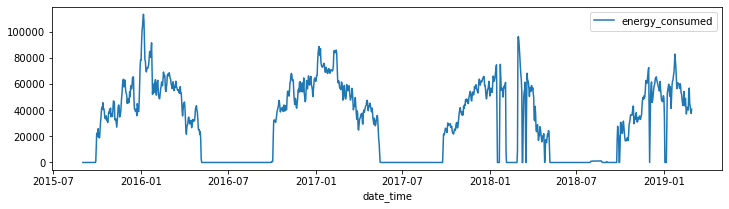

In [8]:
co_daily.plot(x="date_time", y=["energy_consumed"], figsize=(12, 3))
plt.show

### Fill missing values from 2018

In [9]:
co_daily['date_time'] = pd.to_datetime(co_daily['date_time'], format='%Y.%m.%d %H:%M:%S')
co_daily

,date_time,energy_consumed
0,2015-09-01,2.197
1,2015-09-02,6.132
2,2015-09-03,10.326
3,2015-09-04,10.588
4,2015-09-05,15.352
...,...,...
1272,2019-02-24,45189.764
1273,2019-02-25,43170.373
1274,2019-02-26,39876.236
1275,2019-02-27,37547.258


In [10]:
# Zastąp
# Sprawdź wartości z lutego w innych latach
co_for_replacement = co_daily[['date_time', 'energy_consumed']][(co_daily['date_time'].dt.year != 2018)
                                                    & (co_daily['date_time'].dt.day != 29)] #dzień przestępny z innych lat
#(co_daily['date_time'].dt.month == 2)
# print(co_for_replacement.to_string())


In [11]:
# zagreguj jako rok 2018
co_for_replacement['date_time'] = co_for_replacement['date_time'].apply(lambda dt: dt.replace(year=2018))
co_for_replacement = co_for_replacement.groupby('date_time', as_index=False).agg(energy_consumed=('energy_consumed', 'mean'))
# co_for_replacement

In [12]:
# merge column with new values in co_agg
co_daily_adj = co_daily.copy()
co_daily_adj = co_daily_adj.merge(co_for_replacement[['date_time', 'energy_consumed']],on='date_time',how="left")

#Let's have a look at feb 2018 data (new values vs old, missing values)
x = co_daily_adj[:][(co_daily_adj['date_time'].dt.year == 2018)]
# print(x.to_string())


# Replace missing values for Feb 2018

co_daily_adj['energy_consumed_x'] = np.where((co_daily_adj['energy_consumed_x'] == 0) & (co_daily_adj['energy_consumed_y'].notnull()), co_daily_adj['energy_consumed_y'], co_daily_adj['energy_consumed_x'])
co_daily_adj.drop(["energy_consumed_y"], inplace=True, axis=1)
co_daily_adj.rename(columns={'energy_consumed_x':'energy_consumed'},inplace=True)




In [13]:
# We can see only 0 were replaced with mean values from other years
x = co_daily_adj[:][(co_daily_adj['date_time'].dt.year == 2018)]
# print(x.to_string())

<function matplotlib.pyplot.show(close=None, block=None)>

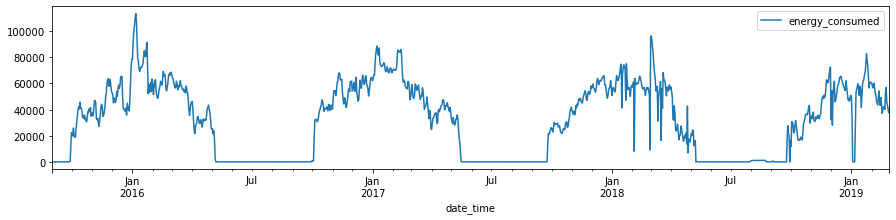

In [14]:
# zeros from 2018 are replaced with means from other years
co_daily_adj.plot(x="date_time", y=["energy_consumed"], figsize=(15, 3))
plt.show

In [16]:
#rolling mean last 2 days
# co_daily_adj_mean = co_daily_adj.copy()
# co_daily_adj_mean["energy_consumed"] = train['seasonal_first_difference'].rolling(window=2).mean()
# co_daily_adj_mean.dropna(inplace=True)
# co_daily_adj_mean.plot(x="date_time", y=["energy_consumed"], figsize=(15, 3))
# plt.show

In [17]:
# https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
co_daily_adj

,date_time,energy_consumed
0,2015-09-01,2.197
1,2015-09-02,6.132
2,2015-09-03,10.326
3,2015-09-04,10.588
4,2015-09-05,15.352
...,...,...
1272,2019-02-24,45189.764
1273,2019-02-25,43170.373
1274,2019-02-26,39876.236
1275,2019-02-27,37547.258


C:\Users\User\AppData\Local\Temp/ipykernel_2212/827284896.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(co_daily_adj_mean.energy_consumed, freq=364)


<Figure size 432x288 with 0 Axes>

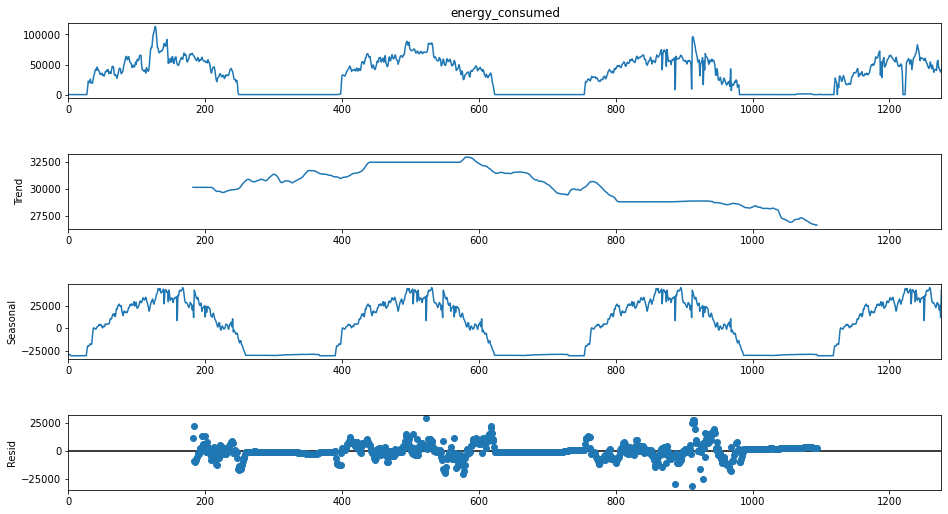

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(co_daily_adj_mean.energy_consumed, freq=364)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [19]:
# just note how to access each part
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid
seasonal

0      -29346.662094
1      -29322.103770
2      -29299.546996
3      -30617.652157
4      -30666.001513
            ...     
1272    26416.440722
1273    20310.369359
1274    25109.406649
1275    11719.324147
1276    42126.006954
Name: seasonal, Length: 1277, dtype: float64

In [20]:
# For testing stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
                
    rolmean = timeseries.rolling(window=364).mean()
    rolstd = timeseries.rolling(window=364).std() # pd.rolling_std(timeseries, window=364)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

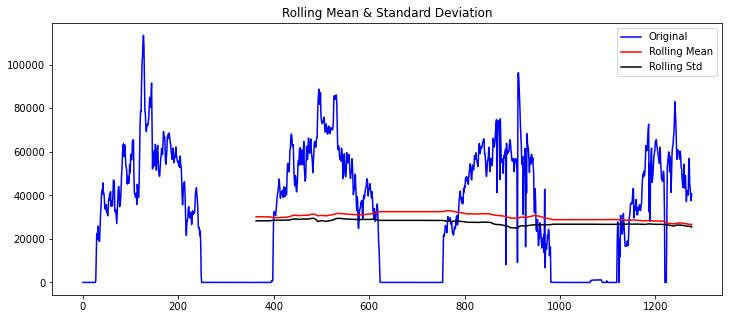

Results of Dickey-Fuller Test:
Test Statistic                   -2.191885
p-value                           0.209204
#Lags Used                       23.000000
Number of Observations Used    1253.000000
Critical Value (1%)              -3.435580
Critical Value (5%)              -2.863849
Critical Value (10%)             -2.568000
dtype: float64


In [21]:
test_stationarity(co_daily_adj_mean['energy_consumed'])

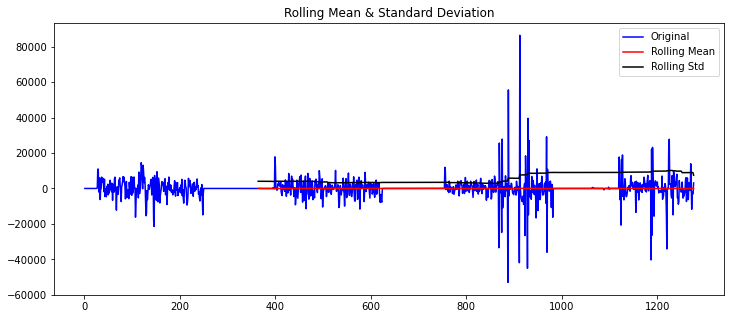

Results of Dickey-Fuller Test:
Test Statistic                -7.732863e+00
p-value                        1.113381e-11
#Lags Used                     2.300000e+01
Number of Observations Used    1.252000e+03
Critical Value (1%)           -3.435584e+00
Critical Value (5%)           -2.863851e+00
Critical Value (10%)          -2.568001e+00
dtype: float64


In [22]:
# The first thing we want to do is take a first difference of the data. 
#This should help to eliminate the overall trend from the data.

co_daily_adj_mean['first_difference'] = co_daily_adj_mean.energy_consumed - co_daily_adj_mean.energy_consumed.shift(1)
test_stationarity(co_daily_adj_mean['first_difference'].dropna(inplace=False))

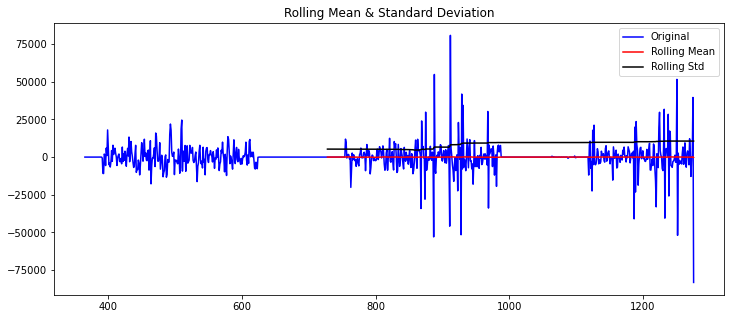

Results of Dickey-Fuller Test:
Test Statistic                -9.284980e+00
p-value                        1.222335e-15
#Lags Used                     2.000000e+01
Number of Observations Used    8.910000e+02
Critical Value (1%)           -3.437711e+00
Critical Value (5%)           -2.864789e+00
Critical Value (10%)          -2.568500e+00
dtype: float64


In [23]:
co_daily_adj_mean['seasonal_first_difference'] = co_daily_adj_mean.first_difference - co_daily_adj_mean.first_difference.shift(364)
test_stationarity(co_daily_adj_mean['seasonal_first_difference'].dropna(inplace=False))

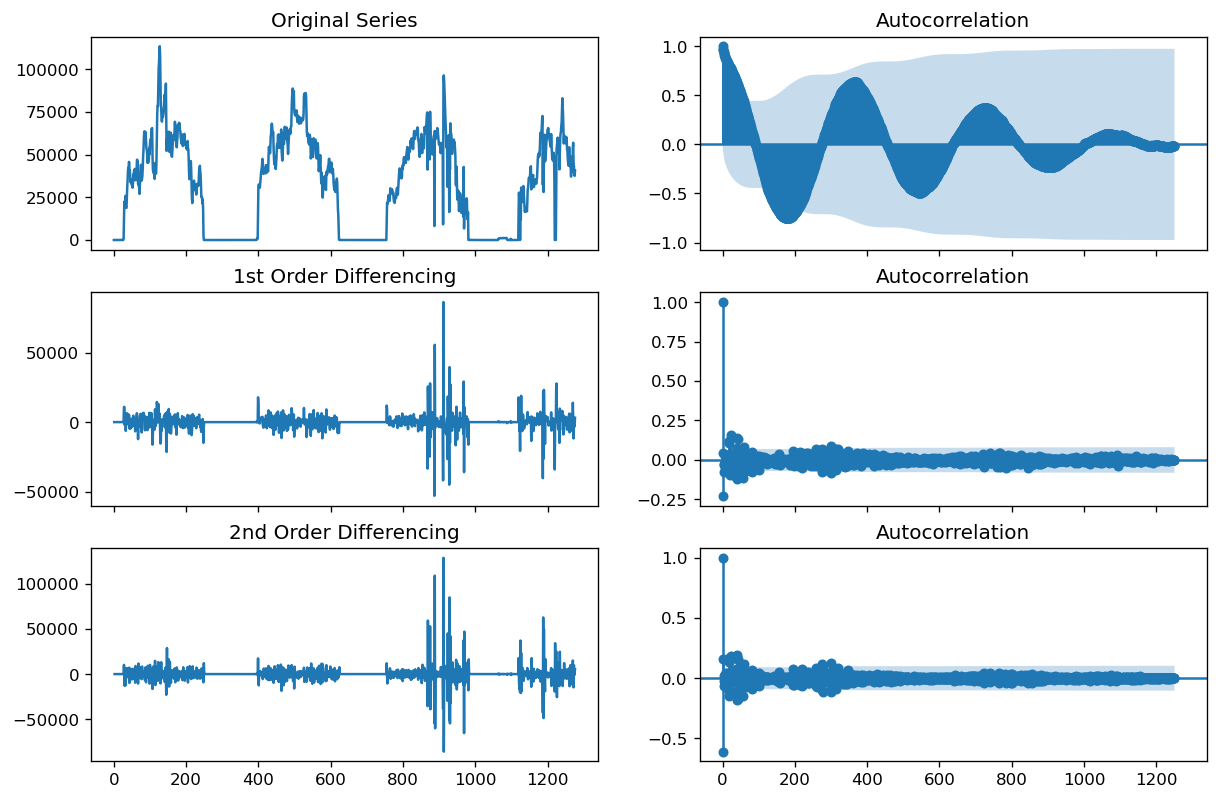

In [24]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(co_daily_adj_mean['energy_consumed']); axes[0, 0].set_title('Original Series')
plot_acf(co_daily_adj_mean['energy_consumed'], lags=1250, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(co_daily_adj_mean['energy_consumed'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(co_daily_adj_mean['energy_consumed'].diff().dropna(), lags=1250, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(co_daily_adj_mean['energy_consumed'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(co_daily_adj_mean['energy_consumed'].diff().diff().dropna(), lags=1250, ax=axes[2, 1])

plt.show()


## Seasonal ARIMA

In [25]:
df

,DeviceID,MeasurementID,date_time,energy_consumed,temperature,wind_velocity,air_humidity,cloudiness,day_length,day_type,season,device_type
0,5004,1.0,2015-09-01 00:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
1,5004,2.0,2015-09-01 01:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
2,5004,3.0,2015-09-01 02:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
3,5004,4.0,2015-09-01 03:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
4,5004,5.0,2015-09-01 04:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
...,...,...,...,...,...,...,...,...,...,...,...,...
3064795,5122,30644.0,2019-02-28 19:00:00,16.955,3.517,0.0,0.0,0.0,10.683,1.0,4.0,CO
3064796,5122,30645.0,2019-02-28 20:00:00,16.946,3.268,0.0,0.0,0.0,10.683,1.0,4.0,CO
3064797,5122,30646.0,2019-02-28 21:00:00,16.872,2.764,0.0,0.0,0.0,10.683,1.0,4.0,CO
3064798,5122,30647.0,2019-02-28 22:00:00,16.594,1.958,0.0,0.0,0.0,10.683,1.0,4.0,CO


<function matplotlib.pyplot.show(close=None, block=None)>

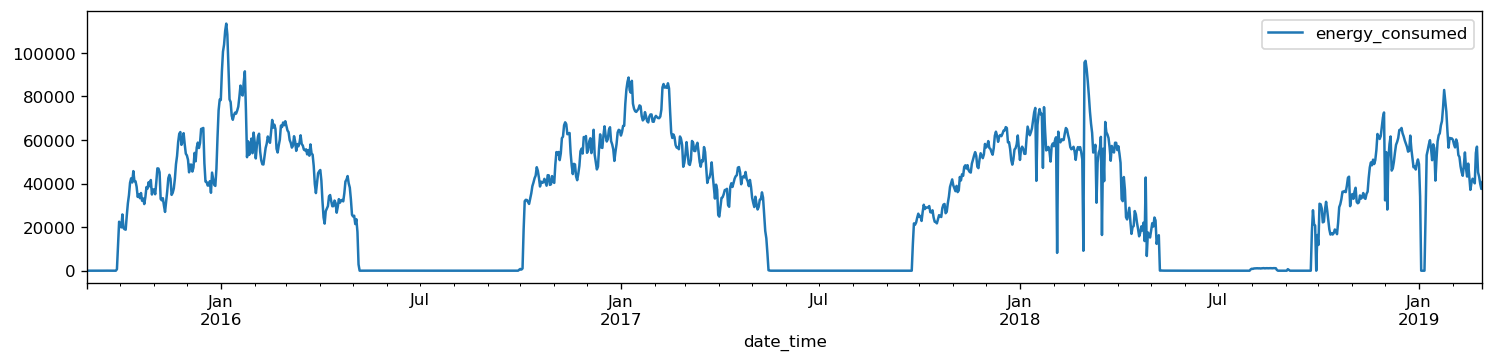

In [26]:
df = co_daily_adj.copy()
df.plot(x="date_time", y=["energy_consumed"], figsize=(15, 3))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

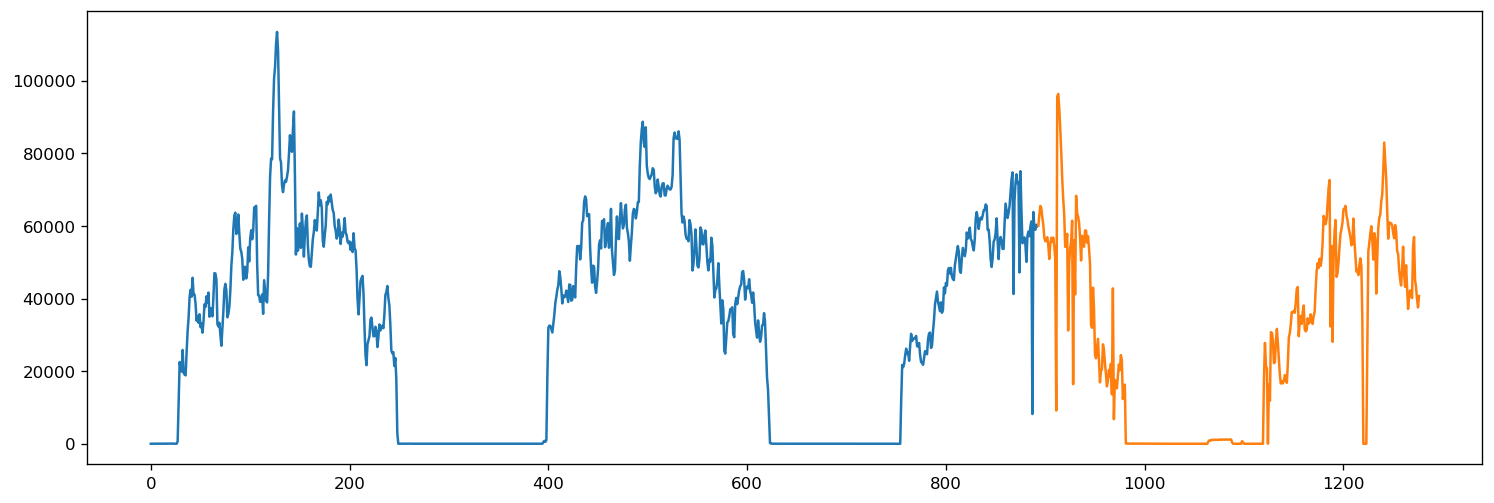

In [27]:
train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]
train['energy_consumed'].plot(figsize=(15, 5))
valid['energy_consumed'].plot(figsize=(15, 5))
plt.show

C:\Users\User\AppData\Local\Temp/ipykernel_2212/874034665.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(train.energy_consumed, freq=364)


<Figure size 1440x960 with 0 Axes>

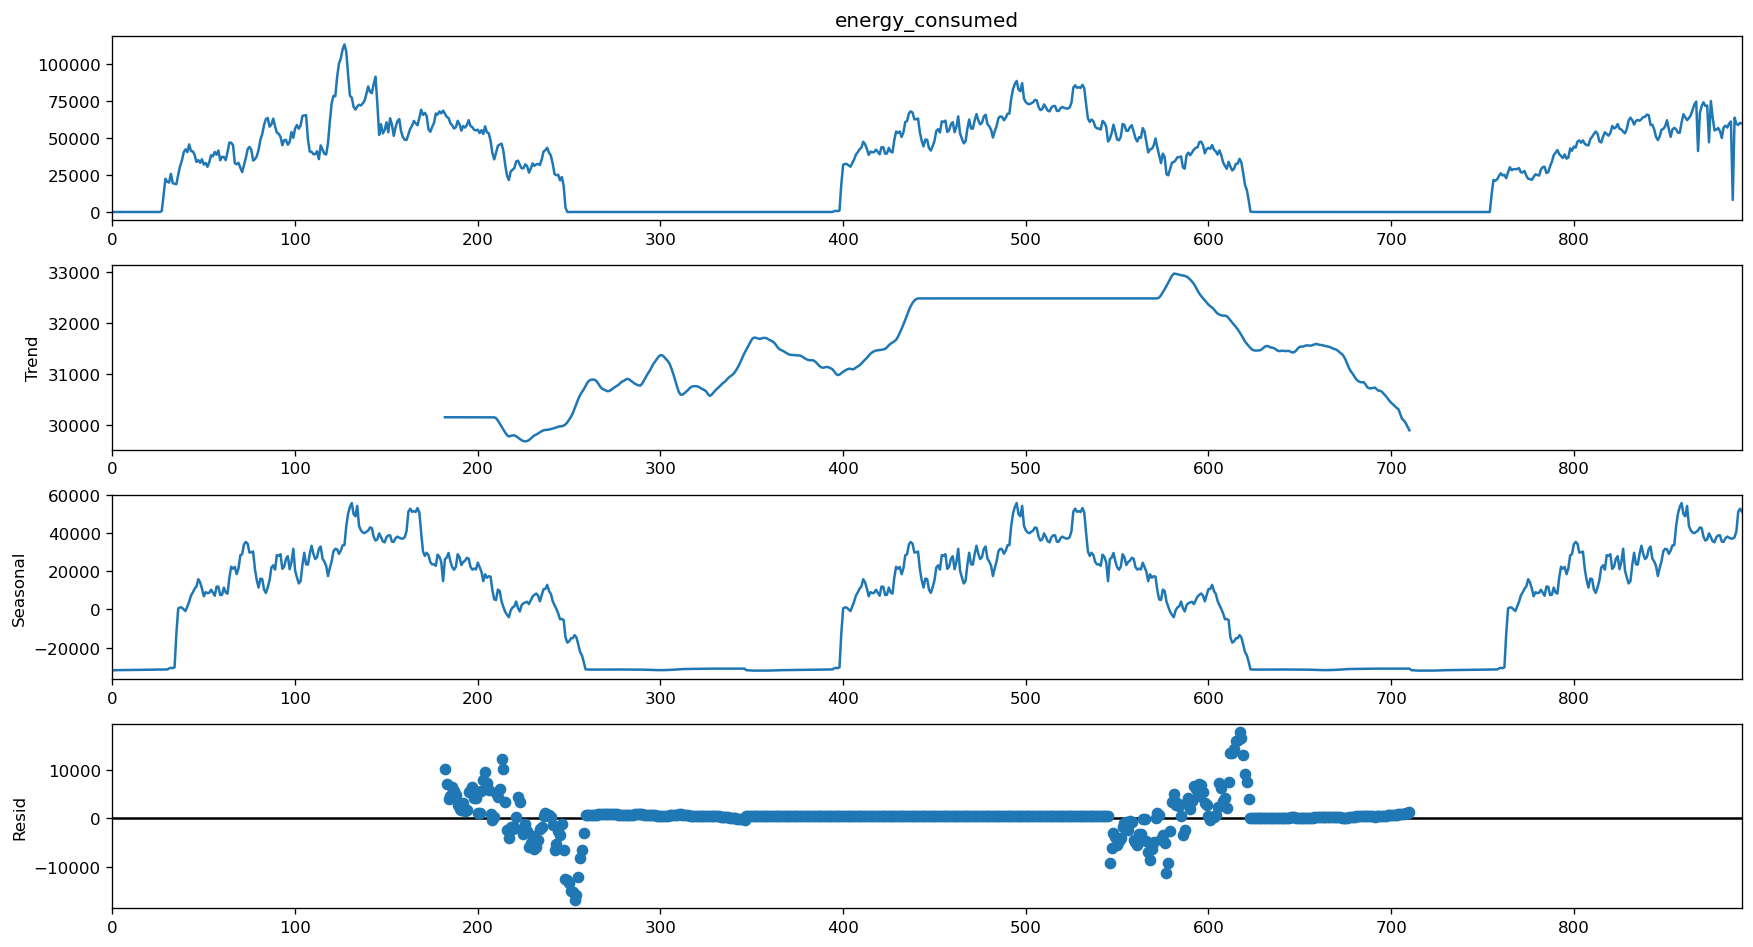

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train.energy_consumed, freq=364)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

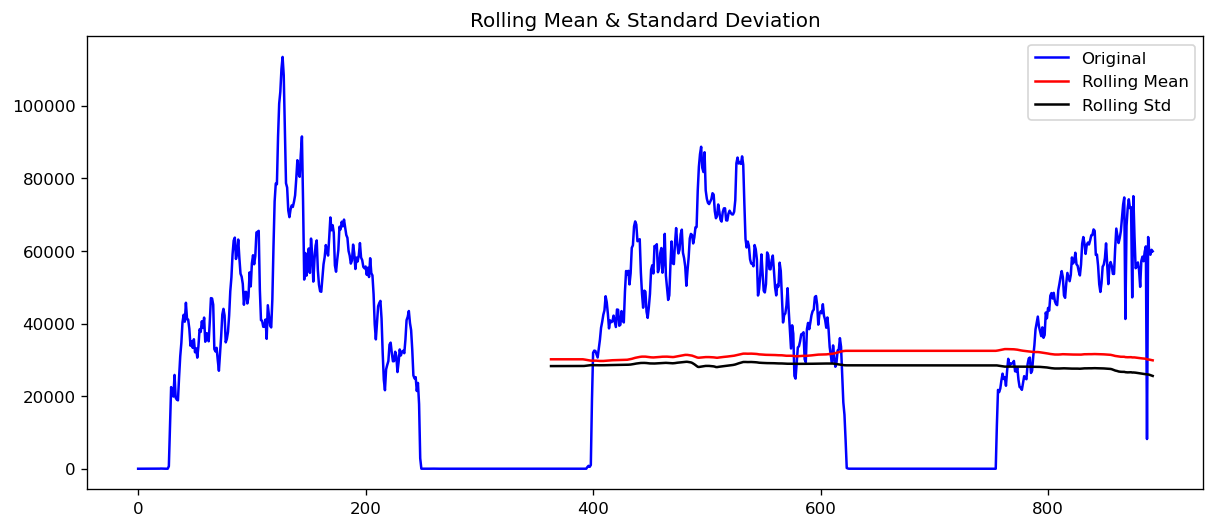

Results of Dickey-Fuller Test:
Test Statistic                  -2.043580
p-value                          0.267797
#Lags Used                      21.000000
Number of Observations Used    871.000000
Critical Value (1%)             -3.437880
Critical Value (5%)             -2.864864
Critical Value (10%)            -2.568540
dtype: float64


In [29]:
test_stationarity(train['energy_consumed'])

C:\Users\User\AppData\Local\Temp/ipykernel_2212/1144136869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['seasonal_first_difference'] = train.energy_consumed - train.energy_consumed.shift(364)


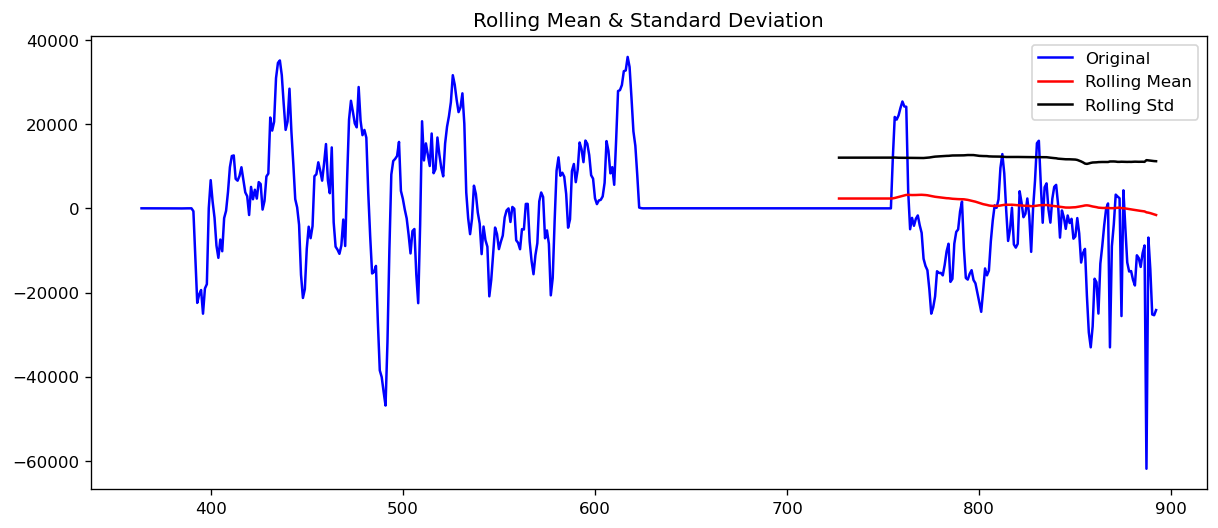

Results of Dickey-Fuller Test:
Test Statistic                  -3.420768
p-value                          0.010271
#Lags Used                      19.000000
Number of Observations Used    509.000000
Critical Value (1%)             -3.443263
Critical Value (5%)             -2.867235
Critical Value (10%)            -2.569803
dtype: float64


In [30]:
train['seasonal_first_difference'] = train.energy_consumed - train.energy_consumed.shift(364) 
test_stationarity(train['seasonal_first_difference'].dropna(inplace=False))

KeyError: 'seasonal_first_difference'

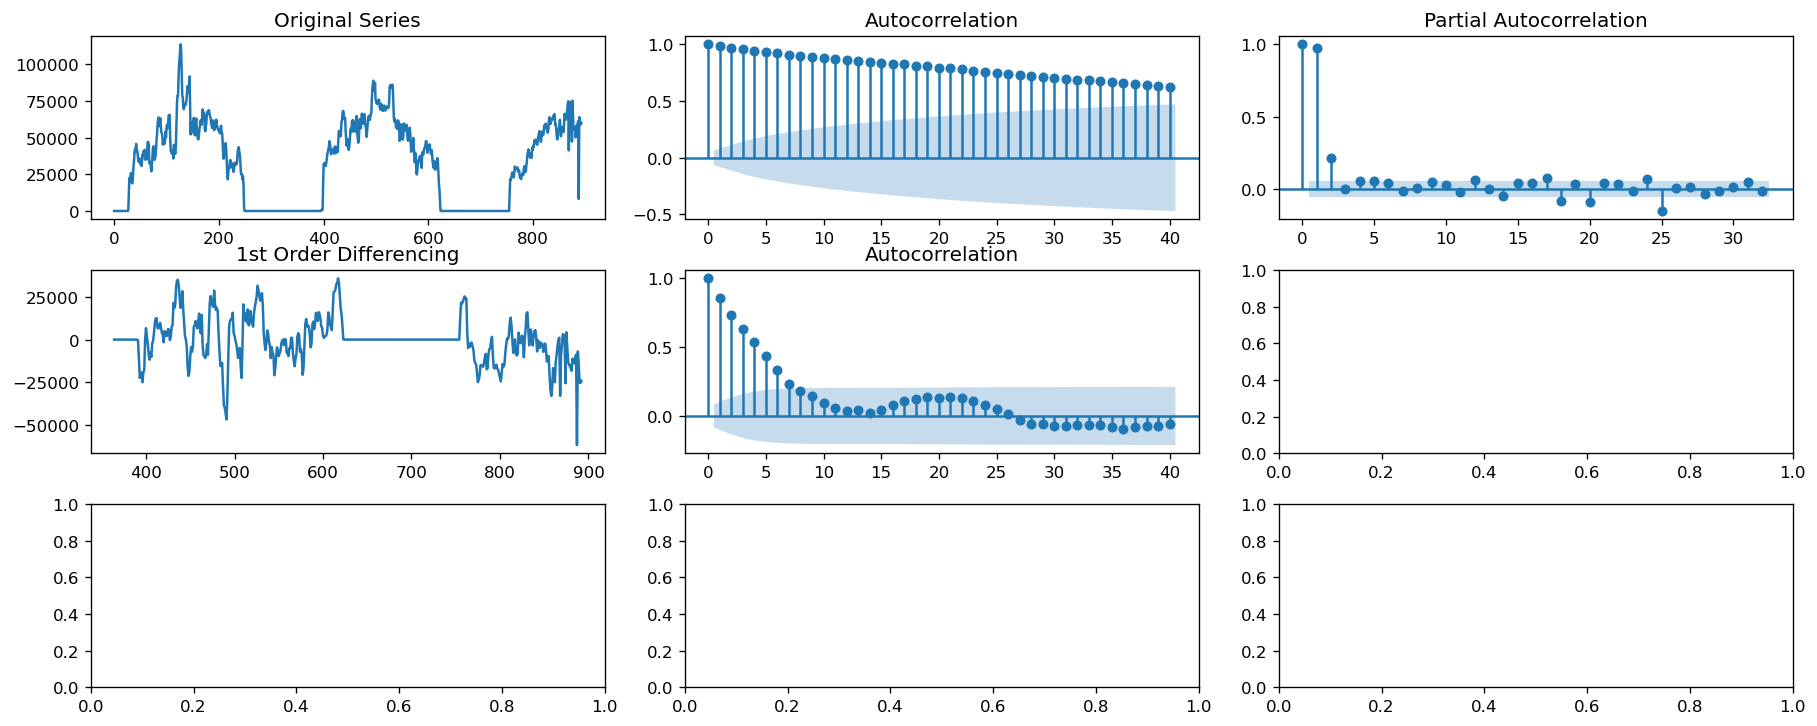

In [31]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 3, sharex=False)
fig.tight_layout()

axes[0, 0].plot(train['energy_consumed']); axes[0, 0].set_title('Original Series')
plot_acf(train['energy_consumed'], lags=40, ax=axes[0, 1])
plot_pacf(df['energy_consumed'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(train['seasonal_first_difference']); axes[1, 0].set_title('1st Order Differencing')
plot_acf(train['seasonal_first_difference'].dropna(), lags=40, ax=axes[1, 1])
plot_pacf(df['seasonal_first_difference'].dropna(), ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(train['seasonal_first_difference'][:].diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train['seasonal_first_difference'].diff().dropna(), lags=40, ax=axes[2, 1])
plot_pacf(train['seasonal_first_difference'].diff().dropna(), ax=axes[2, 2])

plt.show()


In [ ]:
train['seasonal_first_difference'].dropna()

364        2.442000
365       -0.381000
366       -7.576000
367       -7.672000
368      -12.603000
           ...     
888    -6947.806000
889   -14442.625000
890   -25215.067667
891   -25397.014000
892   -24174.019333
Name: seasonal_first_difference, Length: 529, dtype: float64

In [33]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
# adf_test.is_stationary(train['energy_consumed'])
print(adf_test.should_diff(df['energy_consumed']))
print(adf_test.should_diff(train['seasonal_first_difference'].dropna()))  #should_diff replaces deprecated is_stationary.



# train, test = series[1:741], series[742:927]
# train.shape
# valid.shape
# plt.plot(train)
# plt.plot(valid)

# plt.title("Training and Validation Data")
# plt.show()

(0.2766267809917482, True)
(0.01, False)


<function matplotlib.pyplot.show(close=None, block=None)>

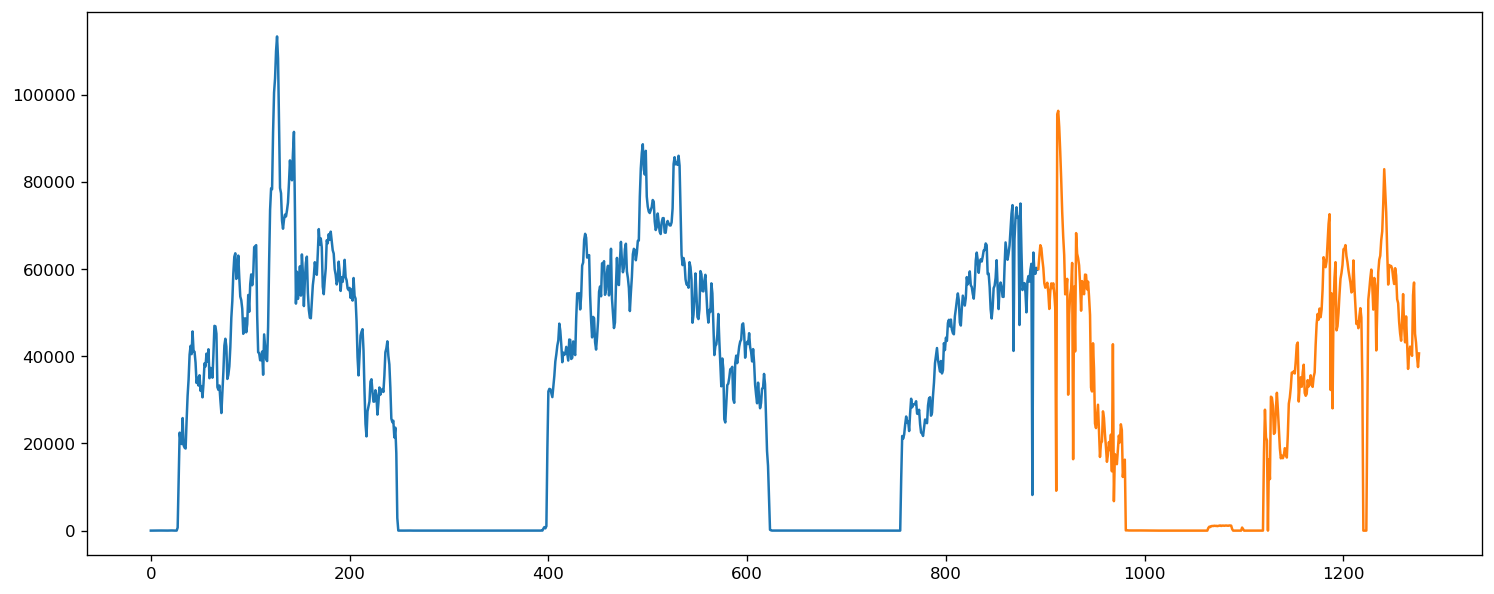

In [34]:
plt.plot(train['energy_consumed'])
plt.plot(valid['energy_consumed'])
plt.show

In [42]:
# check what [d] (differencing term) should we use
# https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.ndiffs.html#pmdarima.arima.ndiffs 
from pmdarima.arima import ndiffs
ndiffs(train['energy_consumed'], alpha=0.05, test='kpss', max_d=5)

1

In [43]:
# check what [D] (seasonal differencing term) should we use
# https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.nsdiffs.html#pmdarima.arima.nsdiffs
from pmdarima.arima import nsdiffs
nsdiffs(train['energy_consumed'], 364, test='ocsb', max_D=5)

0

In [45]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train['energy_consumed'], method='nm', maxiter=30, 
                        start_p=1, start_q=1, max_p=4, max_q=4, 
                        start_P=0, start_Q=0, max_P=4, max_Q=4, m=364, 
                        seasonal=True, trace=True, d=1, D=0, error_action='warn', 
                        suppress_warnings=True, stepwise=True, random_state=20)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[364] intercept   : AIC=17655.189, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[364] intercept   : AIC=17662.133, Time=0.38 sec


MemoryError: Unable to allocate 914. MiB for an array with shape (366, 366, 894) and data type float64



I don't recall the exact source where I read this, but neither auto.arima nor pmdarima are really optimized to scale, which might explain the issues you are facing.

But there are some more important things to note about your question: With 80K data points at 15 minute intervals, ARIMA probably isn't the best type of model for your use case anyway:

    With the frequency and density of your data, it is likely that there are multiple cycles/seasonal patterns, and ARIMA can handle only one seasonal component. So at the very least you should try a model that can handle multiple seasonalities like STS or Prophet (TBATS in R can also handle multiple seasonalities, but it is likely to suffer from the same issues as auto.arima, since it is in the same package).
    At 80K points and 15 minute measurement intervals, I assume you are most likely dealing with a "physical" time series that is the output of a sensor or some other metering/monitoring device (electrical load, network traffic, etc...). These types of time series are usually very good use cases for LSTM or other Deep Learning based models instead of ARIMA.

